In [1]:
import os
import pandas as pd

In [2]:
#to use the uncleaned data
url = 'https://raw.githubusercontent.com/lisb020/scifi_book_game/main/BookList.csv'
pd_df = pd.read_csv(url)
pd_df.head()

,Unnamed: 0,Book_Title,Rating_score,Rating_votes,Book_Description,subgenre
0,0,Obsidian,4.17,236780,Starting over sucks When we moved to West Virg...,sf_aliens
1,1,Onyx,4.27,153429,BEING CONNECTED TO DAEMON BLACK SUCKS… Thanks ...,sf_aliens
2,2,The 5th Wave,4.03,400600,After the 1st wave only darkness remains Aft...,sf_aliens
3,3,The Host,3.84,915026,Melanie Stryder refuses to fade away The eart...,sf_aliens
4,5,Origin,4.35,93979,Daemon will do anything to get Katy back After...,sf_aliens


In [3]:
#to use the uncleaned data
url = 'https://raw.githubusercontent.com/lisb020/scifi_book_game/main/cleanedDf.csv'
pd_df = pd.read_csv(url)

In [4]:
pd_df.drop(columns="Unnamed: 0", inplace=True)
pd_df.head()

,Book_Title,Rating_score,Rating_votes,Book_Description,subgenre,rating
0,Obsidian,4.17,236780,starting sucks moved right senior year id much...,sf_aliens,2
1,Onyx,4.27,153429,connected black sucks thanks alien mojo daemon...,sf_aliens,2
2,The 5th Wave,4.03,400600,wave darkness remains nd escape unlucky surviv...,sf_aliens,2
3,The Host,3.84,915026,refuses fade away invaded species take minds h...,sf_aliens,1
4,Origin,4.35,93979,anything get back successful disastrous mount ...,sf_aliens,2


In [5]:
import math
def round_down(row):
    if (row['Rating_score']>= 4):
      return str(2)
    elif (row['Rating_score']>= 3.75):
      return str(1)
    else:
      return str(0)


pd_df['rating'] = pd_df.apply (lambda row: round_down(row), axis=1) 

In [6]:
print(pd_df['rating'].value_counts())

2    4230
1    3336
0    2674
Name: rating, dtype: int64


In [7]:
def remove_nums(row):
  output = ''.join(c for c in str(row['Book_Description']) if not c.isdigit())
  return(output)

pd_df['Book_Description'] = pd_df.apply (lambda row: remove_nums(row), axis=1) 

In [8]:
def remove_multi_spaces(row):
  single_spaces = " ".join(str(row['Book_Description']).split())
  return(single_spaces)

pd_df['Book_Description'] = pd_df.apply (lambda row: remove_multi_spaces(row), axis=1)   

In [9]:
def remove_unicode(row):
  string_encode = str(row['Book_Description']).encode("ascii", "ignore")
  return(string_encode.decode())

pd_df['Book_Description'] = pd_df.apply (lambda row: remove_unicode(row), axis=1) 

In [10]:
pd_df['subgenre'].unique()

array(['sf_aliens', 'sf_alternate_history', 'sf_alternate_universe',
       'sf_apocalyptic', 'sf_cyberpunk', 'sf_dystopia', 'sf_hard',
       'sf_military', 'sf_robots', 'sf_space_opera', 'sf_steampunk',
       'sf_time_travel'], dtype=object)

In [11]:
## Run this only when you want to clean the data of stop words
#import nltk
# nltk.download('stopwords')

# stop_words = nltk.corpus.stopwords.words("english")

# namesurl = 'https://raw.githubusercontent.com/lisb020/scifi_book_game/main/names_data.csv'
# names_df = pd.read_csv(namesurl)

# list_of_names = names_df['name'].to_list()
# name_list = []
# for name in list_of_names:
#     name_list.append(name.lower())

# stop_words.extend(name_list)
# number_words =["one","two","three","four","five","six","seven","eight","nine","ten"]
# stop_words.extend(number_words)
# print(stop_words)
# def filter_stop_words(row, stop_words):
#   desc_list = [word for word in row['Book_Description'].lower().split() if word not in stop_words] 
#   return ' '.join(desc_list) 


#pd_df['Book_Description'] = pd_df.apply (lambda row: filter_stop_words(row,stop_words), axis=1) 

# desc = filter_stop_words(pd_df['Book_Description'].iloc[10].lower(),stop_words)
# print(desc)
#pd_df.to_csv("cleanedDf.csv")

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.preprocessing.text import Tokenizer as kerasTokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np


MAX_NB_WORDS = 50000
# This is fixed.
EMBEDDING_DIM = 100
MAX_SEQUENCE_LENGTH = 250

tokenizer = kerasTokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(pd_df['Book_Description'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 49874 unique tokens.


In [13]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [14]:

X = tokenizer.texts_to_sequences(pd_df['Book_Description'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)


Shape of data tensor: (10240, 250)


In [15]:
#SUBGENRE

Y = pd.get_dummies(pd_df['subgenre']).values
print('Shape of label tensor:', Y.shape)
print(Y)

Shape of label tensor: (10240, 12)
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(9216, 250) (9216, 12)
(1024, 250) (1024, 12)


In [17]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(12, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 250, 100)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 12)                1212      
Total params: 5,081,612
Trainable params: 5,081,612
Non-trainable params: 0
_________________________________________________________________
None


In [18]:

epochs = 30
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0002)])

Epoch 1/30
130/130 [==============================] - 125s 932ms/step - loss: 2.4650 - accuracy: 0.1107 - val_loss: 2.4508 - val_accuracy: 0.1161
Epoch 2/30
130/130 [==============================] - 123s 951ms/step - loss: 2.4254 - accuracy: 0.1327 - val_loss: 2.4201 - val_accuracy: 0.1367
Epoch 3/30
130/130 [==============================] - 124s 957ms/step - loss: 2.3184 - accuracy: 0.2024 - val_loss: 2.2652 - val_accuracy: 0.1996
Epoch 4/30
130/130 [==============================] - 124s 955ms/step - loss: 2.1698 - accuracy: 0.2558 - val_loss: 2.1718 - val_accuracy: 0.2473
Epoch 5/30
130/130 [==============================] - 126s 966ms/step - loss: 2.0579 - accuracy: 0.2676 - val_loss: 2.0988 - val_accuracy: 0.2646
Epoch 6/30
130/130 [==============================] - 125s 959ms/step - loss: 1.9433 - accuracy: 0.2890 - val_loss: 2.0179 - val_accuracy: 0.2744
Epoch 7/30
130/130 [==============================] - 125s 961ms/step - loss: 1.8086 - accuracy: 0.3466 - val_loss: 2.0103 -

In [19]:
accr = model.evaluate(X_test,Y_test)
print('Model Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

32/32 [==============================] - 2s 54ms/step - loss: 1.9900 - accuracy: 0.4541
Model Test set
  Loss: 1.990
  Accuracy: 0.454


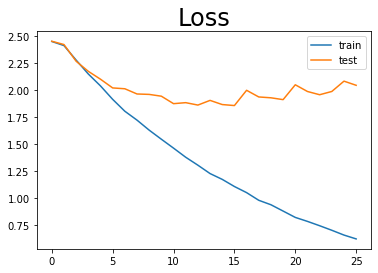

In [27]:
import matplotlib.pyplot as plt
def loss_plot(ax, fontsize=12):
    ax.plot(history.history['loss'], label='train')
    ax.plot(history.history['val_loss'], label='test')
    ax.legend()
    ax.set_title('Loss', fontsize=fontsize)

plt.close('all')
fig, ax = plt.subplots()
loss_plot(ax, fontsize=24)
plt.savefig('subgenre_model_loss.png')


In [21]:

# plt.title('Loss')
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.tight_layout()
# plt.show()

# plt.savefig('subgenre_model_loss.png')

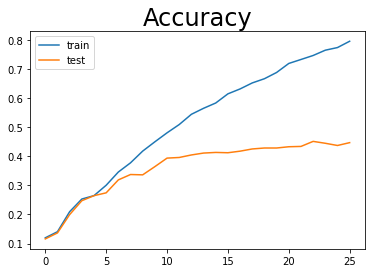

In [22]:
def acc_plot(ax, fontsize=12):
    ax.plot(history.history['accuracy'], label='train')
    ax.plot(history.history['val_accuracy'], label='test')
    ax.legend()
    ax.set_title('Accuracy', fontsize=fontsize)

plt.close('all')
fig, ax = plt.subplots()
acc_plot(ax, fontsize=24)
plt.savefig('subgenre_model_acc.png')

In [23]:
# print(history.history)
# plt.title('Accuracy')
# plt.plot(history.history['accuracy'], label='train')
# plt.plot(history.history['val_accuracy'], label='test')
# plt.legend()
# plt.tight_layout()
# plt.show()
# plt.savefig("subgenre_model_acc.png")

In [24]:
#Test with a single input

new_desc = ["The zombie apocalypse is over. The humans have won. Life is back to normal. And Rip is bored as hell. It's not much of a life sitting in a call center in the poor town of Spanish Shanty, Florida, answering emails like a drone and listening to customer complaints."]
seq = tokenizer.texts_to_sequences(new_desc)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = pd_df["subgenre"].unique()
print(pred, labels[np.argmax(pred)])

[[1.0650991e-02 1.1759328e-02 1.0011291e-01 8.3075255e-01 1.1473468e-02
  7.3326658e-03 4.6854062e-04 6.6233962e-04 4.8784768e-05 4.3687076e-05
  2.6512364e-02 1.8235370e-04]] sf_apocalyptic


In [25]:
model.save("subgenre_trained.h5")

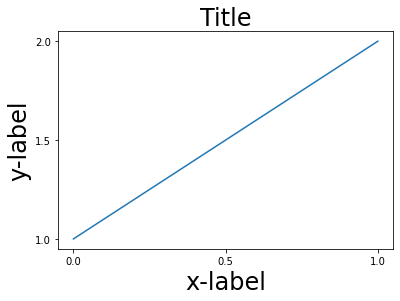

In [26]:
def example_plot(ax, fontsize=12):
    ax.plot([1, 2])

    ax.locator_params(nbins=3)
    ax.set_xlabel('x-label', fontsize=fontsize)
    ax.set_ylabel('y-label', fontsize=fontsize)
    ax.set_title('Title', fontsize=fontsize)

plt.close('all')
fig, ax = plt.subplots()
example_plot(ax, fontsize=24)
plt.savefig("test.png")